In [2]:
import pandas as pd
import datetime
from datetime import timedelta
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df_linac=pd.read_excel("LinacStarts_Jan-Mar2020-2.xlsx")
df_linac.drop(['CreatedDateCTSim', 'CreatedTmCTSim',
              'CTSim','CTSimTm',
              'CreatedDateTx','CreatedTmTx',
              'TxStartDt','TxStartTm'], axis=1, inplace=True)
df_linac.head()

,MRN,CreatedCTSim,CTSim.1,CreatedTx,TxStart,Unit,Intent,Diagnosis,RxSite,Fracs,DosePrescribed
0,48245,2020/01/31 09:48,2020/01/31 13:30,2020/01/31 10:47,2020/02/01 13:30,WA17,Palliative,"C30.0, Nasal cavity",LHIP,1.0,800.0
1,48245,2020/03/03 16:05,2020/03/03 17:00,2020/03/03 16:06,2020/03/04 17:30,NA12,Palliative,"C30.0, Nasal cavity",HIP LT,1.0,800.0
2,58266,2020/02/19 15:27,2020/02/24 15:45,2020/02/25 13:21,2020/03/16 11:45,EA05,Adjuvant,"C50.9, Breast, NOS",R SUPRACLAV,25.0,5000.0
3,77511,2019/12/27 10:09,2020/01/03 12:45,2020/01/10 13:27,2020/01/16 15:25,EA05,Curative,"C34.2, Lung, middle lobe",Thorax,20.0,6000.0
4,110187,2020/03/06 15:16,2020/03/10 09:30,2020/03/13 16:10,2020/03/24 12:30,EA05,Adjuvant,"C50.4, Breast, upper-outer quadrant",R BREAST,16.0,4240.0


In [4]:
df_linac['MRN'].nunique()

1355

In [5]:
df_linac.shape

(1394, 11)

In [6]:
df_ebooking=pd.read_excel("data_ebooking_activitiondate_jan-mar2020-2.xlsx")
df_ebooking.drop(['CreatedDate','CreatedTime','ActivatedDate','ActivatedTime','PlanCreateDate','PlanCreateTime',
                 'GTV/CTVPromtDate','GTV/CTVPromtTime','GTV/CTVCompleteDate','GTV/CTVCompleteTime',
                 'ReviewDatePlaner','ReviewTimePlaner','PlanReviewRequestDate','PlanReviewRequestTime',
                 'FinalPlanPromtDate','FinalPlanPromtTime','FinalPlanCompleteDate','FinalPlanCompleteTime',
                 'eBookingReviDate','eBookingReviTime','SimApptDate','SimApptTime',
                 'PlanProgressReviewDate','PlanProgressReviewTime','eBookRevisionDate','eBookRevisionTime'],
                axis=1, inplace=True)
df_ebooking.head()

,MRN,Created,Activated,SiteGroup,Diagnosis,Category,PlanCreated,StartDate,ConcurrentTx,Intent1,...,eBookingRevi,StartDate.1,Location,SimAppt,PlanProgressReview,eBookRevi,COVID19,COVID19.1,eBookingStatus,ReqeustedTxStartDate
0,48245,2020/01/30 18:33,2020/01/30 18:35,Head & Neck,Distant Metastasis,Urgent 2,2020/01/30 18:34,2020-02-01,No concurrent chemotherapy,Palliative,...,2020/01/31 11:17,2020-02-01,CTSim 4,2020/01/31 13:30,NaN,2020/01/31 11:17,NaT,NaN,Complete,2020-02-01
1,48245,2020/01/30 18:33,2020/01/30 18:35,Head & Neck,Distant Metastasis,Urgent 2,2020/01/31 11:17,2020-02-01,No concurrent chemotherapy,Palliative,...,2020/01/31 11:17,2020-02-01,CTSim 4,2020/01/31 13:30,NaN,2020/01/31 11:17,NaT,NaN,Complete,2020-02-01
2,48245,2020/01/30 18:33,2020/01/30 18:35,Head & Neck,Distant Metastasis,Urgent 2,2020/02/03 12:19,2020-02-01,No concurrent chemotherapy,NaN,...,2020/01/31 11:17,2020-02-01,CTSim 4,2020/01/31 13:30,NaN,2020/01/31 11:17,NaT,NaN,Complete,2020-02-01
3,48245,2020/03/03 15:58,2020/03/03 16:01,Head & Neck,Distant Metastasis,Urgent 2,2020/03/03 16:00,2020-03-04,No concurrent chemotherapy,Palliative,...,NaN,2020-03-04,CTSim 4,2020/03/03 17:30,NaN,NaN,NaT,NaN,Complete,NaT
4,58266,2020/02/19 15:20,2020/02/19 15:21,Breast,"Ca Breast, Other",Planned Delay 3,2020/02/19 15:21,2020-03-16,No concurrent chemotherapy,Radical,...,NaN,2020-03-16,CTSim 3,2020/02/24 15:45,2020/02/28 16:39,NaN,NaT,NaN,Complete,2020-03-16


In [7]:
df_ebooking.shape

(4085, 28)

In [8]:
df_ebooking['MRN'].nunique()

1638

In [9]:
df_MR = df_ebooking[df_ebooking['Location']=="MRSim"]


In [10]:
df_linac["Unit"].unique()

array(['WA17', 'NA12', 'EA05', 'EV06', 'EA08', 'EA07', 'NA10', 'SA04',
       'WV16', 'SV02', 'NA11', 'WA15', 'SV03', 'SV01', 'NA09', 'WU14'],
      dtype=object)

In [11]:
df_linac["Intent"].unique()

array(['Palliative', 'Adjuvant', 'Curative', 'Neoadjuvant',
       'Complex Palliative', 'RT - not prescribed',
       'Deferred RT-Curative'], dtype=object)

In [12]:
df_linac["Diagnosis"].unique()

array(['C30.0, Nasal cavity', 'C50.9, Breast, NOS',
       'C34.2, Lung, middle lobe', 'C50.4, Breast, upper-outer quadrant',
       'C50.2, Breast, upper-inner quadrant', 'C61.9, Prostate gland',
       'C32.8, Larynx, overlapping lesion', 'C34.3, Lung, lower lobe',
       'C25.2, Pancreas, tail of', 'C34.9, Lung, NOS',
       'C77.0, Lymph nodes of  head, face and neck',
       'C71.2, Temporal lobe', 'C49.2, Soft tissues of lower limb/hip',
       'C77.3, Lymph nodes of axilla or arm', 'C34.1, Lung, upper lobe',
       'C50.3, Breast, lower-inner quadrant', 'C55.9, Uterus, NOS',
       'C42.1, Bone marrow', 'C49.3, Soft tissues of thorax',
       'C44.3, Skin of other/unspecified parts of face, NOS',
       'C73.9, Thyroid gland', 'C50.5, Breast, lower-outer quadrant',
       'C67.9, Bladder, NOS', 'C11.9, Nasopharynx, NOS',
       'C71.8, Brain, overlapping lesion',
       'C50.1, Breast, central portion', 'C07.9, Parotid gland',
       'C01.9, Tongue, base of, NOS', 'C70.0, Cerebr

In [13]:
df_linac["RxSite"].unique()

array(['LHIP', 'HIP LT', 'R SUPRACLAV', 'Thorax', 'R BREAST', 'L BREAST',
       'PROSTATE BED', 'left necl', 'STEREOTACTIC LUNG', 'PELVIS',
       'PRIMARY', 'Base of tongue/ Neck', 'L temporal', 'left hip',
       'R SUPRACLAV &AXILLA', 'right lung', 'T spine', 'prostate',
       'Pelvis', 'L BREAST RECON', 'PROSTATE', 'TBI repeat',
       'Right LL lung', 'mediastinum', 'PRIMARY NECK', 'T9-11',
       'SPINE THORACIC', 'L temporal brain', 'SPINE L', 'SBRT lung',
       'H&N', 'L frontal GBM', 'LT BREAST', 'PRIMARY 2D 1013',
       'Cervicothoracicspine', 'HIP RT', 'PRIMARY 3D 2SNN 1004', 'TBI',
       'L SUPRACLAV &AXILLA', 'Left temporal dura', 'L 6 rib',
       'left pelvis/femur', 'SPINE T4-6', 'L Pelvic PSMA LNs', 'Brain',
       'R BREAST & IMN', 'abdominal node', 'PRIMARY 3D 2SNN 1024',
       'L LUNG', 'TL SPINE', 'THORAX', 'R ING PELVIS',
       'PRIMARY 3D 1SNN 1003', 'L BREAST PARTIAL', 'Spleen rep course',
       'Lt Clavicle', 'LIVER', 'LS spine', 'R hip and femur', 'WBR

In [14]:
df_ebooking["SiteGroup"].unique()

array(['Head & Neck', 'Breast', 'GI Upper', 'Skin', 'GU', 'Lung', 'CNS',
       'Sarcoma', 'Gynae', 'Lymphoma', 'Endocrine', 'GI Lower', 'Eye',
       'Paediatrics', 'lung'], dtype=object)

In [15]:
df_ebooking["Diagnosis"].unique()

array(['Distant Metastasis', 'Ca Breast, Other', 'Ca Liver',
       'Ca Breast, Upper-outer Quadrant', 'Ca Breast NOS (excludes Skin)',
       'Ca Breast, Upper-inner Quadrant', 'Squamous Cell Carcinoma',
       'Ca Bladder', 'larynx', 'Mets to Bone - Ca Breast', 'Ca Pancreas',
       'ca lung NSCLC-central', 'Glioblastoma Multiforme',
       'Extremity - Lower', 'Locoregional Recurrence - Ca Breast',
       'ca lung NSCLC-right', 'Ca Prostate', 'Uterine',
       "Kaposi's Sarcoma", 'U:  MDS', 'Brain Metastases', 'Intrathoracic',
       'Skin w/ Clinical Perineural Spread',
       'Thyroid Ca - Differentiated', 'ca lung NSCLC-left',
       'D: MALT Lymphoma', 'Ca Esophagus', 'GI Upper - Other',
       'Ca Breast, Central Portion', 'Salivary Glands (Major)',
       'Oropharynx', 'mets bone - ca lung', 'P: AML', 'Meningioma',
       'Ca Anal Canal', 'Ca Breast, Lower-outer Quadrant',
       'B: Diffuse Large B-Cell Lymphoma', 'F: Multiple Myeloma',
       'ca lung-other', 'mets brain - c

In [16]:
df_ebooking.Category.unique()

array(['Urgent 2', 'Planned Delay 3', 'Standard 3', 'Emergency 1',
       'Standard 2', 'Urgent ICU/SDU 2'], dtype=object)

In [17]:
# Remove MRScans, only keeping CTSims
df_eb=df_ebooking[(df_ebooking["Location"]!="MRSim")&(df_ebooking['Location']!='Rm 16-726')
                  &(df_ebooking["Location"]!="Clinical Markup")]

In [18]:
df_eb2 = df_eb.drop_duplicates()
df_eb2.head()

,MRN,Created,Activated,SiteGroup,Diagnosis,Category,PlanCreated,StartDate,ConcurrentTx,Intent1,...,eBookingRevi,StartDate.1,Location,SimAppt,PlanProgressReview,eBookRevi,COVID19,COVID19.1,eBookingStatus,ReqeustedTxStartDate
0,48245,2020/01/30 18:33,2020/01/30 18:35,Head & Neck,Distant Metastasis,Urgent 2,2020/01/30 18:34,2020-02-01,No concurrent chemotherapy,Palliative,...,2020/01/31 11:17,2020-02-01,CTSim 4,2020/01/31 13:30,NaN,2020/01/31 11:17,NaT,NaN,Complete,2020-02-01
1,48245,2020/01/30 18:33,2020/01/30 18:35,Head & Neck,Distant Metastasis,Urgent 2,2020/01/31 11:17,2020-02-01,No concurrent chemotherapy,Palliative,...,2020/01/31 11:17,2020-02-01,CTSim 4,2020/01/31 13:30,NaN,2020/01/31 11:17,NaT,NaN,Complete,2020-02-01
2,48245,2020/01/30 18:33,2020/01/30 18:35,Head & Neck,Distant Metastasis,Urgent 2,2020/02/03 12:19,2020-02-01,No concurrent chemotherapy,NaN,...,2020/01/31 11:17,2020-02-01,CTSim 4,2020/01/31 13:30,NaN,2020/01/31 11:17,NaT,NaN,Complete,2020-02-01
3,48245,2020/03/03 15:58,2020/03/03 16:01,Head & Neck,Distant Metastasis,Urgent 2,2020/03/03 16:00,2020-03-04,No concurrent chemotherapy,Palliative,...,NaN,2020-03-04,CTSim 4,2020/03/03 17:30,NaN,NaN,NaT,NaN,Complete,NaT
4,58266,2020/02/19 15:20,2020/02/19 15:21,Breast,"Ca Breast, Other",Planned Delay 3,2020/02/19 15:21,2020-03-16,No concurrent chemotherapy,Radical,...,NaN,2020-03-16,CTSim 3,2020/02/24 15:45,2020/02/28 16:39,NaN,NaT,NaN,Complete,2020-03-16


In [19]:
# after removing non-CT simulations and duplicates
df_eb2.shape

(3350, 28)

In [20]:
#find duplicate MRNs with different createdDate
#df_eb2_dup = df_eb2[df_eb2["MRN"].duplicated()]
#df_eb2_dup = df2_dup.sort_values(by=['MRN', 'ApptDate'])

In [21]:
#df_eb2_dup.head()

In [22]:
df = df_eb2['StartDate']
df.head()

0   2020-02-01
1   2020-02-01
2   2020-02-01
3   2020-03-04
4   2020-03-16
Name: StartDate, dtype: datetime64[ns]

In [23]:
df_eb2['Created2'] = pd.to_datetime(df_eb2['Created']) #object to datetime
df_eb2['CreatedDate'] = df_eb2['Created2'].dt.date #keep only the date
df_eb2['CreatedDate_dt'] = df_eb2['Created2']

<ipython-input-23-b4f4e82b09cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eb2['Created2'] = pd.to_datetime(df_eb2['Created']) #object to datetime
<ipython-input-23-b4f4e82b09cc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eb2['CreatedDate'] = df_eb2['Created2'].dt.date #keep only the date
<ipython-input-23-b4f4e82b09cc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [24]:
#df_eb2['CreatedDate'] is of type object

In [25]:
df_eb2['WaitTime'] = df_eb2['StartDate'] - pd.to_datetime(df_eb2['CreatedDate'])
#df_eb2[''] = datetime.strptime(df_eb2['StartDate'],'%d/%m/%y %H:%M:%S') - df_eb2['Created']

<ipython-input-25-f1f7055a7e5d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eb2['WaitTime'] = df_eb2['StartDate'] - pd.to_datetime(df_eb2['CreatedDate'])


In [26]:
df_eb2['WaitTime'] = df_eb2['StartDate']-pd.to_datetime(df_eb2['CreatedDate'])

<ipython-input-26-6782eb3c7bb4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eb2['WaitTime'] = df_eb2['StartDate']-pd.to_datetime(df_eb2['CreatedDate'])


In [27]:
df_eb2.head()

,MRN,Created,Activated,SiteGroup,Diagnosis,Category,PlanCreated,StartDate,ConcurrentTx,Intent1,...,PlanProgressReview,eBookRevi,COVID19,COVID19.1,eBookingStatus,ReqeustedTxStartDate,Created2,CreatedDate,CreatedDate_dt,WaitTime
0,48245,2020/01/30 18:33,2020/01/30 18:35,Head & Neck,Distant Metastasis,Urgent 2,2020/01/30 18:34,2020-02-01,No concurrent chemotherapy,Palliative,...,NaN,2020/01/31 11:17,NaT,NaN,Complete,2020-02-01,2020-01-30 18:33:00,2020-01-30,2020-01-30 18:33:00,2 days
1,48245,2020/01/30 18:33,2020/01/30 18:35,Head & Neck,Distant Metastasis,Urgent 2,2020/01/31 11:17,2020-02-01,No concurrent chemotherapy,Palliative,...,NaN,2020/01/31 11:17,NaT,NaN,Complete,2020-02-01,2020-01-30 18:33:00,2020-01-30,2020-01-30 18:33:00,2 days
2,48245,2020/01/30 18:33,2020/01/30 18:35,Head & Neck,Distant Metastasis,Urgent 2,2020/02/03 12:19,2020-02-01,No concurrent chemotherapy,NaN,...,NaN,2020/01/31 11:17,NaT,NaN,Complete,2020-02-01,2020-01-30 18:33:00,2020-01-30,2020-01-30 18:33:00,2 days
3,48245,2020/03/03 15:58,2020/03/03 16:01,Head & Neck,Distant Metastasis,Urgent 2,2020/03/03 16:00,2020-03-04,No concurrent chemotherapy,Palliative,...,NaN,NaN,NaT,NaN,Complete,NaT,2020-03-03 15:58:00,2020-03-03,2020-03-03 15:58:00,1 days
4,58266,2020/02/19 15:20,2020/02/19 15:21,Breast,"Ca Breast, Other",Planned Delay 3,2020/02/19 15:21,2020-03-16,No concurrent chemotherapy,Radical,...,2020/02/28 16:39,NaN,NaT,NaN,Complete,2020-03-16,2020-02-19 15:20:00,2020-02-19,2020-02-19 15:20:00,26 days


In [28]:
# one way to see all patients' wait time is by dropping duplicates by MRN and Created
df_wt = df_eb2[['MRN','StartDate','WaitTime']]
df_wt2 = df_wt.drop_duplicates()

In [29]:
df_wt2.WaitTime.dt.days

0        2.0
3        1.0
4       26.0
6       19.0
10      13.0
        ... 
4067    21.0
4069     NaN
4070    32.0
4082     2.0
4084     0.0
Name: WaitTime, Length: 1730, dtype: float64

In [30]:
df_wt2[df_wt2.WaitTime.dt.days > 50]

,MRN,StartDate,WaitTime
241,851048,2020-04-08,72 days
275,956555,2020-04-20,84 days
310,1013283,2020-04-27,75 days
686,2251699,2020-03-16,53 days
780,2386140,2020-03-30,76 days
843,2496821,2020-03-18,56 days
975,2846823,2020-03-02,54 days
1143,3155987,2020-03-23,68 days
1219,3245800,2020-04-22,58 days
1249,3285217,2020-05-04,82 days


In [31]:
df_eb2['StartDate']

0      2020-02-01
1      2020-02-01
2      2020-02-01
3      2020-03-04
4      2020-03-16
          ...    
4079   2020-02-18
4081   2020-02-18
4082   2020-01-31
4083   2020-01-31
4084   2020-03-12
Name: StartDate, Length: 3350, dtype: datetime64[ns]

In [32]:
df_linac2 = df_linac.drop_duplicates()
df_linac2['StartDate'] = pd.to_datetime(df_linac2['TxStart']).dt.date

#df_merged = pd.merge(left=df_linac2, right=df_eb2, how='left', on=keys)

In [33]:
df_linac2['MRN'].nunique()

1355

In [34]:
# merge patients in Ebooking and MQ
key = "MRN"
i1 = df_eb2.set_index(key).index
i2 = df_linac2.set_index(key).index
filtered_eb = df_eb2[i1.isin(i2)] # so that ebooking contains MRNs from the df_linac2, where eb_MRN == linac_MRN

In [35]:
filtered_eb.shape #from ebooking, containing MRNs from MQ

(2451, 32)

In [36]:
# now all MRNs from MQ is contained in ebooking
filtered_eb['MRN'].nunique()

1141

In [37]:
d_mq = df_linac2[~i2.isin(i1)]
d_mq['MRN'].nunique() #MRNs that are in MQ but not in ebooking

214

In [38]:
d_eb = df_eb2[~i1.isin(i2)]
d_eb['MRN'].nunique() #MRNs that are in ebooking but not in MQ

463

In [39]:
# df_linac2["StartDate"] is of type object
# filtered_eb["StartDate"] is of type datetime64[ns]
# merging requires them to be of the same type
# converting df_linac2 start date to datetime
df_linac2['StartDate'] = pd.to_datetime(df_linac2['StartDate'])

In [40]:
#result = pd.concat([df_merged, df_linac2], axis=1, join='inner')
keys = ["MRN","StartDate"]
#result = filtered_eb.merge(df_linac2, left_on=keys, right_on = keys, how='inner')

result = df_eb2.merge(df_linac2, left_on=keys, right_on=keys, how='inner')
# tried merging withour filtering ebooking, got same result

In [41]:
#result.to_excel("df_results.xlsx", engine='xlsxwriter')

In [42]:
result.shape

(1973, 42)

In [43]:
result["MRN"].nunique() # all the entries for studying now

994

In [44]:
# Durations of the pretreatment steps ??????
#result["bfCT"] = result["Sim"]

In [45]:
result.columns

Index(['MRN', 'Created', 'Activated', 'SiteGroup', 'Diagnosis_x', 'Category',
       'PlanCreated', 'StartDate', 'ConcurrentTx', 'Intent1', 'Intent2',
       'Team', 'GTV/CTVPromt', 'GTV/CTVComplete', 'ReviewPlanner',
       'PlanReviewReq', 'FinalPlanPromt', 'FinalPlanComplete', 'eBookingRevi',
       'StartDate.1', 'Location', 'SimAppt', 'PlanProgressReview', 'eBookRevi',
       'COVID19', 'COVID19.1', 'eBookingStatus', 'ReqeustedTxStartDate',
       'Created2', 'CreatedDate', 'CreatedDate_dt', 'WaitTime', 'CreatedCTSim',
       'CTSim.1', 'CreatedTx', 'TxStart', 'Unit', 'Intent', 'Diagnosis_y',
       'RxSite', 'Fracs', 'DosePrescribed'],
      dtype='object')

In [46]:
result_cleaned = result.drop_duplicates()
result_cleaned.shape

(1973, 42)

In [47]:
result_cleaned.columns

Index(['MRN', 'Created', 'Activated', 'SiteGroup', 'Diagnosis_x', 'Category',
       'PlanCreated', 'StartDate', 'ConcurrentTx', 'Intent1', 'Intent2',
       'Team', 'GTV/CTVPromt', 'GTV/CTVComplete', 'ReviewPlanner',
       'PlanReviewReq', 'FinalPlanPromt', 'FinalPlanComplete', 'eBookingRevi',
       'StartDate.1', 'Location', 'SimAppt', 'PlanProgressReview', 'eBookRevi',
       'COVID19', 'COVID19.1', 'eBookingStatus', 'ReqeustedTxStartDate',
       'Created2', 'CreatedDate', 'CreatedDate_dt', 'WaitTime', 'CreatedCTSim',
       'CTSim.1', 'CreatedTx', 'TxStart', 'Unit', 'Intent', 'Diagnosis_y',
       'RxSite', 'Fracs', 'DosePrescribed'],
      dtype='object')

In [48]:
#select some columns to represent distinct treatment courses
df_da = result[["MRN","CreatedDate","CreatedDate_dt","SiteGroup","Diagnosis_x","Category","StartDate","Team","WaitTime",
                "Location","CreatedCTSim","SimAppt","Unit","Intent","Diagnosis_y","RxSite","Fracs","DosePrescribed",
                 ]] #"SimAppt"
            # Sim appt keep up with ebooking records

# Remove CT preps, only keeping CTSims
df_da.drop(df_da.loc[df_da["Location"]=="CT Prep"].index, inplace=True)
df_da.drop(df_da.loc[df_da["Location"]=="Pre-Tx Review"].index, inplace=True)
df_da.drop(df_da.loc[df_da["Location"]=="Prep Room-1B"].index, inplace=True)

#df.drop(df.loc[df['line_race']==0].index, inplace=True)
df_da.shape

/Users/fanjia/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(1648, 18)

In [52]:
daDF = df_da.drop_duplicates()
daDF.shape

(1051, 18)

In [51]:
#daDF.to_excel("daDF_testing.xlsx")

In [53]:
# some patients have planned delays during their treatments
daDF[daDF["Category"]=="Planned Delay 3"].shape

(183, 18)

In [54]:
#daDF.to_excel("merged_somecolumns.xlsx")

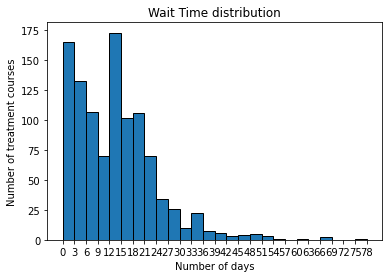

In [55]:
bins = range(0,80,3)

#plt.figure(figsize=(8,8)) #change your figure size as per your desire here
#n,bins,patch = plt.hist(daDF['WaitTime'],bins=bins, color='green', alpha=0.8, label='Value', edgecolor='orange', linewidth=2)

plt.hist(daDF['WaitTime'].dt.days, bins = bins, edgecolor='black')
plt.xlabel('Number of days')
plt.ylabel('Number of treatment courses')
plt.title('Wait Time distribution')
plt.xticks(np.arange(0, 80, 3), fontsize=10)
plt.yticks(fontsize=10)

    
plt.show()

## 1025 total
## 382 courses >14 days, incl. 174 planned delays
##

In [56]:
daDF[daDF.WaitTime.dt.days > 14].count()

MRN               403
CreatedDate       403
CreatedDate_dt    403
SiteGroup         403
Diagnosis_x       403
Category          403
StartDate         403
Team              403
WaitTime          403
Location          403
CreatedCTSim      403
SimAppt           403
Unit              403
Intent            403
Diagnosis_y       403
RxSite            402
Fracs             402
DosePrescribed    402
dtype: int64

In [57]:
daDF.shape

(1051, 18)

In [58]:
# Exclude planned delay patients - daDF2
daDF2 = daDF[daDF['Category']!= 'Planned Delay 3']
daDF2.shape

(868, 18)

In [59]:
#number of patients in this dataset
daDF2["MRN"].nunique()

819

In [60]:
daDF2_copy = daDF2

In [62]:
daDF2.dropna(subset=['Location'], inplace=True)
daDF2.shape

<ipython-input-62-5af4cb7386a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daDF2.dropna(subset=['Location'], inplace=True)


(867, 18)

In [63]:
#daDF2.to_excel('daDF2.xlsx')

### team allocations

In [64]:
SiteGroups = daDF2['SiteGroup'].unique()
SiteGroups

array(['Head & Neck', 'Breast', 'GI Upper', 'Lung', 'Sarcoma', 'GU',
       'Gynae', 'Endocrine', 'CNS', 'Lymphoma', 'Eye', 'GI Lower', 'Skin',
       'Paediatrics'], dtype=object)

In [65]:
df_site = daDF2[daDF2['SiteGroup']=='Head & Neck']
df_site[['SiteGroup','Category','Team','Location']].drop_duplicates()

,SiteGroup,Category,Team,Location
0,Head & Neck,Urgent 2,4,CTSim 4
10,Head & Neck,Urgent 2,1,CTSim 2
57,Head & Neck,Standard 3,1,CTSim 3
210,Head & Neck,Standard 3,1,CTSim 2
219,Head & Neck,Standard 3,2,CTSim 3
486,Head & Neck,Urgent 2,4,CTSim 2
838,Head & Neck,Urgent 2,1,CTSim 4
964,Head & Neck,Urgent 2,1,CTSim 3
1128,Head & Neck,Standard 2,4,CTSim 2
1185,Head & Neck,Standard 3,4,CTSim 4


In [66]:
dfTeam1 = daDF2[daDF2['Team']==1]
dfTeam1[['SiteGroup','Category','Location']].drop_duplicates()

,SiteGroup,Category,Location
10,Head & Neck,Urgent 2,CTSim 2
57,Head & Neck,Standard 3,CTSim 3
126,Eye,Standard 3,CTSim 2
159,Endocrine,Urgent 2,CTSim 2
191,Lung,Standard 3,CTSim 2
210,Head & Neck,Standard 3,CTSim 2
336,Skin,Standard 3,CTSim 3
342,Lymphoma,Urgent 2,CTSim 3
413,Breast,Urgent 2,CTSim 3
479,Lymphoma,Emergency 1,CTSim 2


In [181]:
dfTeam2 = daDF2[daDF2['Team']==2]
dfTeam2['SiteGroup'].unique()

array(['Breast', 'GI Upper', 'Lung', 'Head & Neck', 'Lymphoma', 'GU',
       'Gynae', 'Endocrine'], dtype=object)

In [182]:
dfTeam3 = daDF2[daDF2['Team']==3]
dfTeam3['SiteGroup'].unique()

array(['Gynae', 'GU', 'GI Lower', 'Lung', 'Lymphoma', 'Endocrine'],
      dtype=object)

In [183]:
dfTeam4 = daDF2[daDF2['Team']==4]
dfTeam4['SiteGroup'].unique()

array(['Head & Neck', 'Breast', 'Sarcoma', 'Lung', 'GU', 'Endocrine',
       'CNS', 'Lymphoma', 'GI Lower', 'GI Upper', 'Gynae', 'Skin',
       'Paediatrics', 'Eye'], dtype=object)

## Arrival Patterns
#### Patient arrivals are site-dependent and weekday-dependent. Need to verify this. (ANOVA analysis and probablity-distribution fitting)
#### statistic significance of arrival differences on each weekday

In [425]:
daDF2['CreatedDate']

dtype('O')

In [67]:
daDF2['Year']=pd.to_datetime(daDF2['CreatedDate']).dt.year
daDF2['Month']=pd.to_datetime(daDF2['CreatedDate']).dt.month
daDF2['Week']=pd.to_datetime(daDF2['CreatedDate']).dt.week
daDF2['Weekday']=pd.to_datetime(daDF2['CreatedDate']).dt.dayofweek # 0 is Monday
daDF2.to_excel('daDF2_more.xlsx')

df_tofit=daDF2[(daDF2['Weekday']!= 5) & (daDF2['Weekday']!= 6)]

<ipython-input-67-f30da34e73b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daDF2['Year']=pd.to_datetime(daDF2['CreatedDate']).dt.year
<ipython-input-67-f30da34e73b4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daDF2['Month']=pd.to_datetime(daDF2['CreatedDate']).dt.month
<ipython-input-67-f30da34e73b4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

In [68]:
import pandas as pd
import numpy as np
import scipy
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
# Load data and select first column

patient_arrivals = df_tofit.groupby('CreatedDate').size()

# Create an index array (x) for data
#x = np.arange(len(y))
#size = len(y)

patient_arrivals.to_excel('daily_arrival.xlsx')

In [69]:
y_df=pd.DataFrame(patient_arrivals, columns=['Num'])
y_df.describe()

,Num
count,62.000000
mean,13.838710
std,6.186165
min,1.000000
25%,9.000000
50%,14.000000
75%,19.000000
max,27.000000


In [70]:
sc=StandardScaler()
yy = patient_arrivals.values.reshape(-1,1)
sc.fit(yy)
y_std = sc.transform(yy)
y_std = y_std.flatten()
y_std

array([ 1.65599213, -0.29965572,  0.3522269 ,  0.51519755,  1.33005082,
        0.51519755, -0.46262637, -0.62559703,  0.18925624,  0.84113886,
        0.6781682 ,  0.18925624,  0.02628559,  0.84113886,  1.00410951,
       -0.46262637,  0.51519755,  0.3522269 ,  0.84113886,  0.6781682 ,
        0.6781682 ,  0.84113886,  0.02628559,  0.02628559, -0.46262637,
       -0.13668506, -0.13668506,  1.16708017, -0.78856768,  1.65599213,
        1.00410951,  0.02628559, -0.78856768,  0.84113886, -0.62559703,
        1.16708017, -0.13668506, -1.11450899,  1.49302147,  1.16708017,
        0.3522269 , -0.95153833, -0.78856768,  2.14490409,  1.49302147,
       -0.78856768,  0.02628559,  0.02628559, -0.62559703,  0.84113886,
       -0.78856768, -0.78856768, -0.29965572, -1.44045029, -0.95153833,
       -1.11450899, -1.11450899, -1.7663916 , -2.09233291, -1.92936226,
       -1.92936226, -2.09233291])

In [71]:
dist = getattr(stats, 'norm')
parameters = dist.fit(y_std)
stats.kstest(y_std, "norm", parameters)

KstestResult(statistic=0.07405847422251777, pvalue=0.8607529346465164)

In [72]:
#df_tofit['CreatedDate'].unique()

In [73]:
#arr_by_site = df_tofit.groupby(['CreatedDate','SiteGroup']).size()
arr_by_site = pd.DataFrame()
CreatedDates = df_tofit['CreatedDate'].unique()
#arr_by_site.to_excel('by_site.xlsx')

In [74]:
arr_breast = df_tofit[(df_tofit['CreatedDate']==pd.to_datetime('2020-01-02'))&(df_tofit['SiteGroup']=='Breast')]
arr_breast.SiteGroup.value_counts().values #= arr_breast.SiteGroup.value_counts()
#arr_breast

array([5])

In [449]:
count=[]
for i in SiteGroups:
    for j in CreatedDates:
        
        arr = df_tofit[(df_tofit['CreatedDate']==pd.to_datetime(j))&(df_tofit['SiteGroup']==i)]
        arr_count = arr.SiteGroup.value_counts().values
        if arr_count.size==0:
            arr_count=0
        else:
            arr_count=arr_count[0]
        count.append([i, j, arr_count])

In [450]:
df_countBySite = pd.DataFrame(count, columns=['SiteGroup','CreatedDate','arrivals'])
df_countBySite

,SiteGroup,CreatedDate,arrivals
0,Head & Neck,2020-01-30,1
1,Head & Neck,2020-03-03,2
2,Head & Neck,2020-01-20,1
3,Head & Neck,2020-02-07,0
4,Head & Neck,2020-02-04,1
5,Head & Neck,2020-02-14,0
6,Head & Neck,2020-01-24,0
7,Head & Neck,2020-01-29,2
8,Head & Neck,2020-02-26,3
9,Head & Neck,2020-02-11,1


In [452]:
df_countBySite.to_excel('arrival_by_site.xlsx')

In [308]:
#Weekly arrival of patients of different site groups

#daDF2['CreatedDate_dt']=pd.to_datetime(daDF2['CreatedDate'])
df_arrival = daDF2[['CreatedDate_dt','SiteGroup']]
weekly_arrival = df_arrival.groupby(['SiteGroup']).resample('W', on='CreatedDate_dt').size()
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(weekly_arrival)


SiteGroup    CreatedDate_dt
Breast       2020-01-05         7
             2020-01-12        14
             2020-01-19        12
             2020-01-26        14
             2020-02-02        12
             2020-02-09        13
             2020-02-16        13
             2020-02-23        11
             2020-03-01        21
             2020-03-08        12
             2020-03-15         9
             2020-03-22         4
             2020-03-29         1
CNS          2020-01-05         5
             2020-01-12        10
             2020-01-19         6
             2020-01-26         8
             2020-02-02        11
             2020-02-09         5
             2020-02-16         8
             2020-02-23        10
             2020-03-01         6
             2020-03-08         8
             2020-03-15         3
             2020-03-22         4
             2020-03-29         2
Endocrine    2020-01-05         1
             2020-01-12         1
             2020-01

In [386]:
weekly_arrival.to_excel('weekly_by_site.xlsx')

In [470]:
df_arrival_weekday = df_tofit[['Week','Weekday','SiteGroup']]
weekday_pattern = df_arrival_weekday.groupby(['Week','Weekday']).size()
weekday_pattern

Week  Weekday
1     3          24
      4          12
2     0          16
      1          17
      2          22
      3          17
      4          11
3     0          10
      1          15
      2          19
      3          18
      4          15
4     0          14
      1          19
      2          20
      3          11
      4          17
5     0          16
      1          19
      2          18
      3          18
      4          19
6     0          14
      1          14
      2          11
      3          13
      4          13
7     0          21
      1           9
      2          24
      3          20
      4          14
8     1           9
      2          19
      3          10
      4          21
9     0          13
      1           7
      2          23
      3          21
      4          16
10    0           8
      1           9
      2          27
      3          23
      4           9
11    0          14
      1          14
      2          10
      

In [478]:
arr = df_tofit[(df_tofit['Week']==1)&(df_tofit['Weekday']==3)]
arr_count = arr.CreatedDate.value_counts()
arr_count.values

array([24])

In [479]:
df_arrival_weekday = df_tofit[['Week','Weekday','SiteGroup']]
weekday_pattern = df_arrival_weekday.groupby(['Week','Weekday']).size()
#print(weekday_pattern)
# 0-Monday

count_weekday=[]
for i in df_tofit.Week.unique():
    for j in df_tofit.Weekday.unique():
        arr = df_tofit[(df_tofit['Week']==i)&(df_tofit['Weekday']==j)]
        arr_count = arr.CreatedDate.value_counts().values
        if arr_count.size==0:
            arr_count=0
        else:
            arr_count=arr_count[0]
        count_weekday.append([i, j, arr_count])

In [481]:
count_weekday

[[5, 3, 18],
 [5, 1, 19],
 [5, 0, 16],
 [5, 4, 19],
 [5, 2, 18],
 [10, 3, 23],
 [10, 1, 9],
 [10, 0, 8],
 [10, 4, 9],
 [10, 2, 27],
 [4, 3, 11],
 [4, 1, 19],
 [4, 0, 14],
 [4, 4, 17],
 [4, 2, 20],
 [6, 3, 13],
 [6, 1, 14],
 [6, 0, 14],
 [6, 4, 13],
 [6, 2, 11],
 [7, 3, 20],
 [7, 1, 9],
 [7, 0, 21],
 [7, 4, 14],
 [7, 2, 24],
 [9, 3, 21],
 [9, 1, 7],
 [9, 0, 13],
 [9, 4, 16],
 [9, 2, 23],
 [1, 3, 24],
 [1, 1, 0],
 [1, 0, 0],
 [1, 4, 12],
 [1, 2, 0],
 [2, 3, 17],
 [2, 1, 17],
 [2, 0, 16],
 [2, 4, 11],
 [2, 2, 22],
 [8, 3, 10],
 [8, 1, 9],
 [8, 0, 0],
 [8, 4, 21],
 [8, 2, 19],
 [3, 3, 18],
 [3, 1, 15],
 [3, 0, 10],
 [3, 4, 15],
 [3, 2, 19],
 [11, 3, 19],
 [11, 1, 14],
 [11, 0, 14],
 [11, 4, 9],
 [11, 2, 10],
 [12, 3, 8],
 [12, 1, 12],
 [12, 0, 9],
 [12, 4, 7],
 [12, 2, 5],
 [13, 3, 1],
 [13, 1, 0],
 [13, 0, 7],
 [13, 4, 2],
 [13, 2, 3],
 [14, 3, 0],
 [14, 1, 1],
 [14, 0, 2],
 [14, 4, 0],
 [14, 2, 0]]

In [482]:
df_by_weekday=pd.DataFrame(count_weekday, columns=['Week','Weekday','Arrivals'])
df_by_weekday.to_excel('arrival_by_weekday.xlsx')

In [314]:
type(weekday_pattern)

pandas.core.series.Series

In [61]:
arrival_pattern2=daDF2.groupby(['Month','Category']).size()
arrival_pattern2

Month  Category        
1      Emergency 1           6
       Standard 2            1
       Standard 3          258
       Urgent 2             93
       Urgent ICU/SDU 2      2
2      Emergency 1           6
       Standard 2            2
       Standard 3          210
       Urgent 2             72
3      Emergency 1          10
       Standard 2            4
       Standard 3          128
       Urgent 2             59
dtype: int64

## CT sim wait time

In [ ]:
#daDF2['CT_waitTime'] = pd.to_datetime(daDF2['CTSim.1']).dt.date - pd.to_datetime(daDF2['CreatedDate']).dt.date

# Analysing wait time vs. Category, intent, etc

In [184]:
daDF2.head()

,MRN,CreatedDate,SiteGroup,Diagnosis_x,Category,StartDate,Team,WaitTime,Location,CreatedCTSim,SimAppt,Unit,Intent,Diagnosis_y,RxSite,Fracs,DosePrescribed
0,48245,2020-01-30,Head & Neck,Distant Metastasis,Urgent 2,2020-02-01,4,2 days,CTSim 4,2020/01/31 09:48,2020/01/31 13:30,WA17,Palliative,"C30.0, Nasal cavity",LHIP,1.0,800.0
3,48245,2020-03-03,Head & Neck,Distant Metastasis,Urgent 2,2020-03-04,4,1 days,CTSim 4,2020/03/03 16:05,2020/03/03 17:30,NA12,Palliative,"C30.0, Nasal cavity",HIP LT,1.0,800.0
6,168487,2020-01-20,Breast,Ca Breast NOS (excludes Skin),Standard 3,2020-01-30,2,10 days,CTSim 3,2020/01/20 11:42,2020/01/24 09:30,EV06,Adjuvant,"C50.4, Breast, upper-outer quadrant",R BREAST,16.0,4240.0
7,192382,2020-02-07,Breast,"Ca Breast, Upper-outer Quadrant",Standard 3,2020-03-02,2,24 days,CTSim 3,2020/02/07 10:15,2020/02/19 13:00,EA08,Adjuvant,"C50.4, Breast, upper-outer quadrant",R BREAST,16.0,4240.0
10,282105,2020-02-04,Head & Neck,larynx,Urgent 2,2020-02-11,1,7 days,CTSim 2,2020/02/04 12:23,2020/02/06 15:30,SA04,Palliative,"C32.8, Larynx, overlapping lesion",left necl,1.0,1000.0


In [522]:
daDF2['SiteGroup'].value_counts()

Lung           154
Breast         143
GU             105
CNS             86
Gynae           70
Head & Neck     67
Lymphoma        60
GI Upper        54
Sarcoma         50
GI Lower        35
Endocrine       15
Paediatrics     15
Eye              9
Skin             4
Name: SiteGroup, dtype: int64

In [524]:
daDF2['Category'].value_counts()

Standard 3          613
Urgent 2            223
Emergency 1          22
Standard 2            7
Urgent ICU/SDU 2      2
Name: Category, dtype: int64

In [523]:
daDF2['Intent'].value_counts()

Palliative             329
Curative               202
Adjuvant               192
Complex Palliative     115
Neoadjuvant             24
RT - not prescribed      5
Name: Intent, dtype: int64

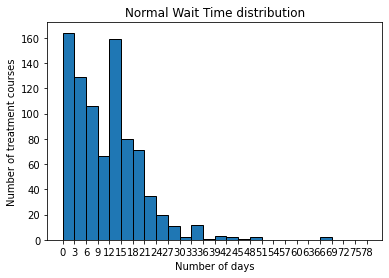

In [188]:
#plt.figure(figsize=(8,8)) #change your figure size as per your desire here
#n,bins,patch = plt.hist(daDF['WaitTime'],bins=bins, color='green', alpha=0.8, label='Value', edgecolor='orange', linewidth=2)

bins = range(0,80,3)
plt.hist(daDF2['WaitTime'].dt.days, bins = bins, edgecolor='black')
plt.xlabel('Number of days')
plt.ylabel('Number of treatment courses')
plt.title('Normal Wait Time distribution')
plt.xticks(np.arange(0, 80, 3), fontsize=10)
plt.yticks(fontsize=10)

    
plt.show()

In [189]:
daDF2['WaitTime']=daDF2.WaitTime.dt.days

<ipython-input-189-fa718736678e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daDF2['WaitTime']=daDF2.WaitTime.dt.days


In [190]:
df_exceed = daDF2[daDF2.WaitTime > 14]
df_exceed.shape

(242, 17)

In [191]:
df_meet = daDF2[daDF2.WaitTime <= 14]
df_meet.shape

(624, 17)

In [192]:
df_fast = daDF2[daDF2.WaitTime <= 5]
df_fast.shape

(293, 17)

### 242/866 = 27% patient exceed 14 days
### 622/851 patients meet the target

## Exceed analysis

#### 39% standard3 patients are delayed

In [193]:
daDF2['Category'].value_counts()

Standard 3          612
Urgent 2            223
Emergency 1          22
Standard 2            7
Urgent ICU/SDU 2      2
Name: Category, dtype: int64

In [194]:
df_exceed['Category'].value_counts()

Standard 3    239
Urgent 2        2
Standard 2      1
Name: Category, dtype: int64

In [494]:
daDF2[daDF2['Category']=='Urgent ICU/SDU 2'].WaitTime.mean()

Timedelta('1 days 00:00:00')

In [497]:
daDF2[daDF2['Category']=='Emergency 1'].WaitTime.mean()

Timedelta('0 days 16:21:49.090909')

In [498]:
daDF2[daDF2['Category']=='Urgent 2'].WaitTime.mean()

Timedelta('3 days 05:55:09.417040')

In [499]:
daDF2[daDF2['Category']=='Standard 2'].WaitTime.mean()

Timedelta('11 days 06:51:25.714285')

In [500]:
daDF2[daDF2['Category']=='Standard 3'].WaitTime.mean()

Timedelta('13 days 20:49:43.360522')

In [162]:
df_exceed.to_excel('waitTimeMoreThan14.xlsx')

In [518]:
df_exceed['SiteGroup'].value_counts()

Breast         51
Gynae          36
Head & Neck    33
GU             25
Lung           25
GI Lower       16
CNS            14
Sarcoma        13
GI Upper       13
Lymphoma        8
Paediatrics     4
Endocrine       2
Eye             1
Skin            1
Name: SiteGroup, dtype: int64

In [521]:
late_percentage_site = []
for i in SiteGroups:
    perc = df_exceed['SiteGroup'].value_counts()[i]/daDF2['SiteGroup'].value_counts()[i]
    late_percentage_site.append([i, perc])
late_percentage_site

[['Head & Neck', 0.4925373134328358],
 ['Breast', 0.35664335664335667],
 ['GI Upper', 0.24074074074074073],
 ['Lung', 0.16233766233766234],
 ['Sarcoma', 0.26],
 ['GU', 0.23809523809523808],
 ['Gynae', 0.5142857142857142],
 ['Endocrine', 0.13333333333333333],
 ['CNS', 0.16279069767441862],
 ['Lymphoma', 0.13333333333333333],
 ['Eye', 0.1111111111111111],
 ['GI Lower', 0.45714285714285713],
 ['Skin', 0.25],
 ['Paediatrics', 0.26666666666666666]]

In [516]:
df_exceed['SiteGroup'].value_counts().Breast/daDF2['SiteGroup'].value_counts().Breast

0.35664335664335667

In [517]:
df_exceed['SiteGroup'].value_counts().Gynae/daDF2['SiteGroup'].value_counts().Gynae

0.5142857142857142

In [519]:
df_exceed['SiteGroup'].value_counts()['Head & Neck']/daDF2['SiteGroup'].value_counts()['Head & Neck']

0.4925373134328358

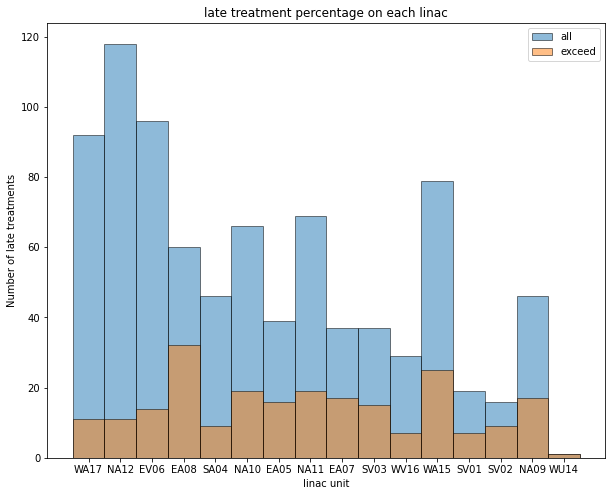

In [137]:
plt.figure(figsize=[10,8])
bins = range(0,17)

x = df_exceed['Unit']
y = daDF2['Unit']
plt.hist(y, bins = bins, alpha=0.5, edgecolor='black', label='all', align='left')
plt.hist(x, bins = bins, alpha=0.5, edgecolor='black', label='exceed', align='left')


plt.legend(loc='upper right')

plt.xlabel('linac unit')
plt.ylabel('Number of late treatments')
plt.title('late treatment percentage on each linac')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [146]:
units = daDF2['Unit'].unique()
all_num_treatments = daDF2['Unit'].value_counts()
late_num_treatments = df_exceed['Unit'].value_counts()
linac_late_percentage = []
for i in units:
    exceed_percentage = late_num_treatments[i]/all_num_treatments[i]
    linac_late_percentage.append([i, exceed_percentage])   

In [147]:
linac_late_percentage

[['WA17', 0.11956521739130435],
 ['NA12', 0.09322033898305085],
 ['EV06', 0.14583333333333334],
 ['EA08', 0.5333333333333333],
 ['SA04', 0.1956521739130435],
 ['NA10', 0.2878787878787879],
 ['EA05', 0.41025641025641024],
 ['NA11', 0.2753623188405797],
 ['EA07', 0.4594594594594595],
 ['SV03', 0.40540540540540543],
 ['WV16', 0.2413793103448276],
 ['WA15', 0.31645569620253167],
 ['SV01', 0.3684210526315789],
 ['SV02', 0.5625],
 ['NA09', 0.3695652173913043],
 ['WU14', 1.0]]

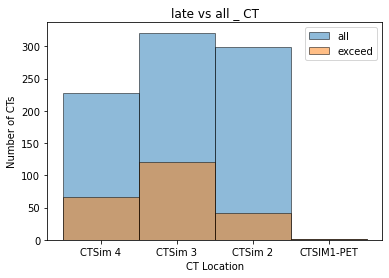

In [149]:
#plt.figure(figsize=[10,8])
bins = range(0,5)

x = df_exceed['Location']
y = daDF2['Location']
plt.hist(y, bins = bins, alpha=0.5, edgecolor='black', label='all', align='left')
plt.hist(x, bins = bins, alpha=0.5, edgecolor='black', label='exceed', align='left')

plt.legend(loc='upper right')

plt.xlabel('CT Location')
plt.ylabel('Number of CTs')
plt.title('late vs all _ CT')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [484]:
CTs = daDF2['Location'].unique()
all_num_CT = daDF2['Location'].value_counts()
late_num_CT = df_exceed['Location'].value_counts()
CT_late_percentage = []
for i in CTs:
    exceed_percentage = late_num_CT[i]/all_num_CT[i]
    CT_late_percentage.append([i, exceed_percentage]) 
    
CT_late_percentage

[['CTSim 4', 0.3093220338983051],
 ['CTSim 3', 0.38414634146341464],
 ['CTSim 2', 0.13953488372093023],
 ['CTSIM1-PET', 0.5]]

In [491]:
df_exceed['CT_waitTime'] = pd.to_datetime(df_exceed['SimAppt']).dt.date - pd.to_datetime(df_exceed['CreatedDate']).dt.date
df_meet['CT_waitTime'] = pd.to_datetime(df_meet['SimAppt']).dt.date - pd.to_datetime(df_meet['CreatedDate']).dt.date

In [502]:
df_exceed['CT_waitTime'].mean()

Timedelta('7 days 20:43:38.181818')

In [492]:
df_meet['CT_waitTime'].mean()

Timedelta('2 days 06:36:55.384615')

In [77]:
result.columns

Index(['MRN', 'Created', 'Activated', 'SiteGroup', 'Diagnosis_x', 'Category',
       'PlanCreated', 'StartDate', 'ConcurrentTx', 'Intent1', 'Intent2',
       'Team', 'GTV/CTVPromt', 'GTV/CTVComplete', 'ReviewPlanner',
       'PlanReviewReq', 'FinalPlanPromt', 'FinalPlanComplete', 'eBookingRevi',
       'StartDate.1', 'Location', 'SimAppt', 'PlanProgressReview', 'eBookRevi',
       'COVID19', 'COVID19.1', 'eBookingStatus', 'ReqeustedTxStartDate',
       'Created2', 'CreatedDate', 'CreatedDate_dt', 'WaitTime', 'CreatedCTSim',
       'CTSim.1', 'CreatedTx', 'TxStart', 'Unit', 'Intent', 'Diagnosis_y',
       'RxSite', 'Fracs', 'DosePrescribed'],
      dtype='object')

In [84]:
daDF2_copy.columns

Index(['MRN', 'CreatedDate', 'CreatedDate_dt', 'SiteGroup', 'Diagnosis_x',
       'Category', 'StartDate', 'Team', 'WaitTime', 'Location', 'CreatedCTSim',
       'SimAppt', 'Unit', 'Intent', 'Diagnosis_y', 'RxSite', 'Fracs',
       'DosePrescribed', 'Year', 'Month', 'Week', 'Weekday'],
      dtype='object')

In [ ]:
# filter result by df_exceed for the inter-step activities
df_exceed = daDF2_copy[daDF2_copy.WaitTime.dt.days > 14]
df_exceed['marker']=1
joined = pd.merge(result, df_exceed, on=['MRN', 'CreatedDate', 'SiteGroup', 'Diagnosis_x', 'Category',
       'StartDate', 'Team', 'WaitTime', 'Location', 'CreatedCTSim',
       'CTSim.1', 'Unit', 'Intent', 'Diagnosis_y', 'RxSite', 'Fracs',
       'DosePrescribed'], how='left')
df_exceed_all = joined[joined['marker']==1]


In [ ]:
df_exceed_all.columns
df_exceed_all.to_excel("df_exceed_all.xlsx")

#### Full useful columns on all courses:

In [86]:
#daDF2 contains non-planned-delayed patients

all_joined = pd.merge(result, daDF2_copy, on=['MRN', 'CreatedDate', 'SiteGroup', 'Diagnosis_x', 'Category',
       'StartDate', 'Team', 'WaitTime', 'Location', 'CreatedCTSim',
       'SimAppt', 'Unit', 'Intent', 'Diagnosis_y', 'RxSite', 'Fracs',
       'DosePrescribed'], how='left')


#all_joined.to_excel("daDF2_full_cols_all.xlsx")

In [88]:
all_joined.columns

Index(['MRN', 'Created', 'Activated', 'SiteGroup', 'Diagnosis_x', 'Category',
       'PlanCreated', 'StartDate', 'ConcurrentTx', 'Intent1', 'Intent2',
       'Team', 'GTV/CTVPromt', 'GTV/CTVComplete', 'ReviewPlanner',
       'PlanReviewReq', 'FinalPlanPromt', 'FinalPlanComplete', 'eBookingRevi',
       'StartDate.1', 'Location', 'SimAppt', 'PlanProgressReview', 'eBookRevi',
       'COVID19', 'COVID19.1', 'eBookingStatus', 'ReqeustedTxStartDate',
       'Created2', 'CreatedDate', 'CreatedDate_dt_x', 'WaitTime',
       'CreatedCTSim', 'CTSim.1', 'CreatedTx', 'TxStart', 'Unit', 'Intent',
       'Diagnosis_y', 'RxSite', 'Fracs', 'DosePrescribed', 'CreatedDate_dt_y',
       'Year', 'Month', 'Week', 'Weekday'],
      dtype='object')

In [ ]:
df_Durations=pd.DataFrame()

In [ ]:
df_Durations['CTWaitTime'] = pd.datetime(df_exceed_all['CTSim.1']).dt.days
                                - pd.datetime(df_exceed_all['Created']).dt.days

In [ ]:
df_exceed.SiteGroup.unique()

In [ ]:
df_exceed.groupby('SiteGroup')['WaitTime'].mean()

In [ ]:
df_meet.SiteGroup.unique()

In [ ]:
df_meet.groupby('SiteGroup')['WaitTime'].mean()

In [ ]:
df_exceed["Category"].unique()
# Mostly Standard 3 (226/229)

In [ ]:
df_exceed.groupby('Category')['WaitTime'].mean()

In [ ]:
df_meet.Category.unique()

In [ ]:
df_meet.groupby('Category')['WaitTime'].mean()

In [ ]:
#testing
daDF2[daDF2['Category']=='Emergency 1']['WaitTime']

In [ ]:
plt.hist(daDF2[daDF2['Category']=='Urgent 2']['WaitTime'])


In [ ]:
x=np.arange(0,7)
print(x)

In [ ]:
fig,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,4))
#x=np.arange(0,7)
y=daDF2[daDF2['Category']=='Emergency 1']['WaitTime']
y1 = daDF2[daDF2['Category']=='Urgent ICU/SDU 2']['WaitTime']
x2 = np.arange(0,25)
y2 = daDF2[daDF2['Category']=='Urgent 2']['WaitTime']

ax1.hist(y)
ax1.set_title('Emergency 1')
ax1.set_xlabel('Wait time')
ax1.set_ylabel('Number')
ax2.hist(y1)
ax2.set_title('Urgent ICU/SDU 2')
ax2.set_xlabel('Wait time')
ax3.hist(y2)
ax3.set_title('Urgent 2')
ax3.set_xlabel('Wait time')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [ ]:
fig,(ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

y = daDF2[daDF2['Category']=='Emergency 1']['WaitTime']
y1 = daDF2[daDF2['Category']=='Urgent ICU/SDU 2']['WaitTime']
x2 = np.arange(0,25)
y2 = daDF2[daDF2['Category']=='Urgent 2']['WaitTime']
ax1.hist(daDF2[daDF2['Category']=='Standard 2']['WaitTime'])
ax1.set_title('Standard 2')
ax1.set_xlabel('Wait time')
ax2.hist(daDF2[daDF2['Category']=='Standard 3']['WaitTime'])
ax2.set_title('Standard 3')
ax2.set_xlabel('Wait time')

In [ ]:
daDF2.groupby('Intent')['WaitTime'].mean()

In [ ]:
fig,(ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(15,4))

ax1.hist(daDF2[daDF2['Intent']=='Palliative']['WaitTime'])
ax1.set_title('Palliative')
ax1.set_xlabel('Wait time')
ax2.hist(daDF2[daDF2['Intent']=='Complex Palliative']['WaitTime'])
ax2.set_title('Complex Palliative')
ax2.set_xlabel('Wait time')
ax3.hist(daDF2[daDF2['Intent']=='RT - not prescribed']['WaitTime'])
ax3.set_title('RT - not prescribed')
ax3.set_xlabel('Wait time')

In [ ]:
fig,(ax4,ax5,ax6) = plt.subplots(1, 3, figsize=(15,4))
ax4.hist(daDF2[daDF2['Intent']=='Adjuvant']['WaitTime'])
ax4.set_title('Adjuvant')
ax4.set_xlabel('Wait time')
ax5.hist(daDF2[daDF2['Intent']=='Curative']['WaitTime'])
ax5.set_title('Curative')
ax5.set_xlabel('Wait time')
ax6.hist(daDF2[daDF2['Intent']=='Neoadjuvant']['WaitTime'])
ax6.set_title('Neoadjuvant')
ax6.set_xlabel('Wait time')

In [ ]:
daDF2.sort_values(by="WaitTime")

In [ ]:
df_meet[df_meet["Category"]=="Standard 3"].count()

In [ ]:
daDF2['Category'].unique()

In [ ]:
daDF2[daDF2["Category"]=="Standard 3"].count() # 593/848 = 72.3% of all patients are Standard 3

In [ ]:
# >14 days:
dose_14 = df_exceed["DosePrescribed"]
waitTime_14 = df_exceed["WaitTime"].dt.days

# <=14 days
df_meet = daDF2[daDF2.WaitTime.dt.days <= 14]
dose_meet = df_meet["DosePrescribed"]
waitTime_meet = df_meet["WaitTime"].dt.days

In [ ]:
df_exceed["WaitTime"]

In [ ]:
plt.scatter(waitTime_14,dose_14,c='r')
plt.scatter(waitTime_meet, dose_meet, c='b', marker='s', label='-1')
plt.ylabel('Dose')
plt.show()

In [ ]:
plt.scatter(waitTime_14,dose_14,c='r')

In [ ]:
plt.scatter(waitTime_meet, dose_meet, c='b', marker='s', label='-1')

In [ ]:
df_meet.shape

In [ ]:
df_trtapp = pd.read_excel("LinacAppts_jan1-mar31-2020.xls")
df_trtapp.head()

## SiteGroup vs. CT scan Location

In [465]:
df_CT = daDF2[['SiteGroup','Location']]
df_CT.dropna(inplace=True)

In [466]:
dict_siteCT = dict()
for i in df_CT['SiteGroup'].unique():
    print(i)
    dict_siteCT[i]=np.unique(df_CT[df_CT['SiteGroup']==i]['Location'].values)

Head & Neck
Breast
GI Upper
Lung
Sarcoma
GU
Gynae
Endocrine
CNS
Lymphoma
Eye
GI Lower
Skin
Paediatrics


In [467]:
dict_siteCT

{'Head & Neck': array(['CTSim 2', 'CTSim 3', 'CTSim 4'], dtype=object),
 'Breast': array(['CTSim 2', 'CTSim 3', 'CTSim 4'], dtype=object),
 'GI Upper': array(['CTSim 2', 'CTSim 3', 'CTSim 4'], dtype=object),
 'Lung': array(['CTSim 2', 'CTSim 3', 'CTSim 4'], dtype=object),
 'Sarcoma': array(['CTSim 2', 'CTSim 3'], dtype=object),
 'GU': array(['CTSIM1-PET', 'CTSim 2', 'CTSim 3', 'CTSim 4'], dtype=object),
 'Gynae': array(['CTSim 2', 'CTSim 3', 'CTSim 4'], dtype=object),
 'Endocrine': array(['CTSim 2', 'CTSim 3', 'CTSim 4'], dtype=object),
 'CNS': array(['CTSim 2', 'CTSim 3', 'CTSim 4'], dtype=object),
 'Lymphoma': array(['CTSim 2', 'CTSim 3', 'CTSim 4'], dtype=object),
 'Eye': array(['CTSim 2', 'CTSim 4'], dtype=object),
 'GI Lower': array(['CTSIM1-PET', 'CTSim 2', 'CTSim 3', 'CTSim 4'], dtype=object),
 'Skin': array(['CTSim 3'], dtype=object),
 'Paediatrics': array(['CTSim 2', 'CTSim 3', 'CTSim 4'], dtype=object)}